### Lab 7:  Convolutional Neural Networks

(c) Peter Samoaa

### CASE STUDY: FASHION CLASS CLASSIFICATION 


The global fashion industry is valued at three trillion dollars and accounts for two percent of the world's GDP.
The fashion industry is undergoing a dramatic transformation by adopting new computer vision and machine learning and deep learning techniques. In this case study, we will look at a hypothetical situation, will assume that a fashion retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing, either bags, dresses and pants. 
The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns. in this study, we're going to use the fashion MNIST data. It's a dataset that contains images of bags, shoes and dresses and we're asking the deep network to classify the images into ten classes. 


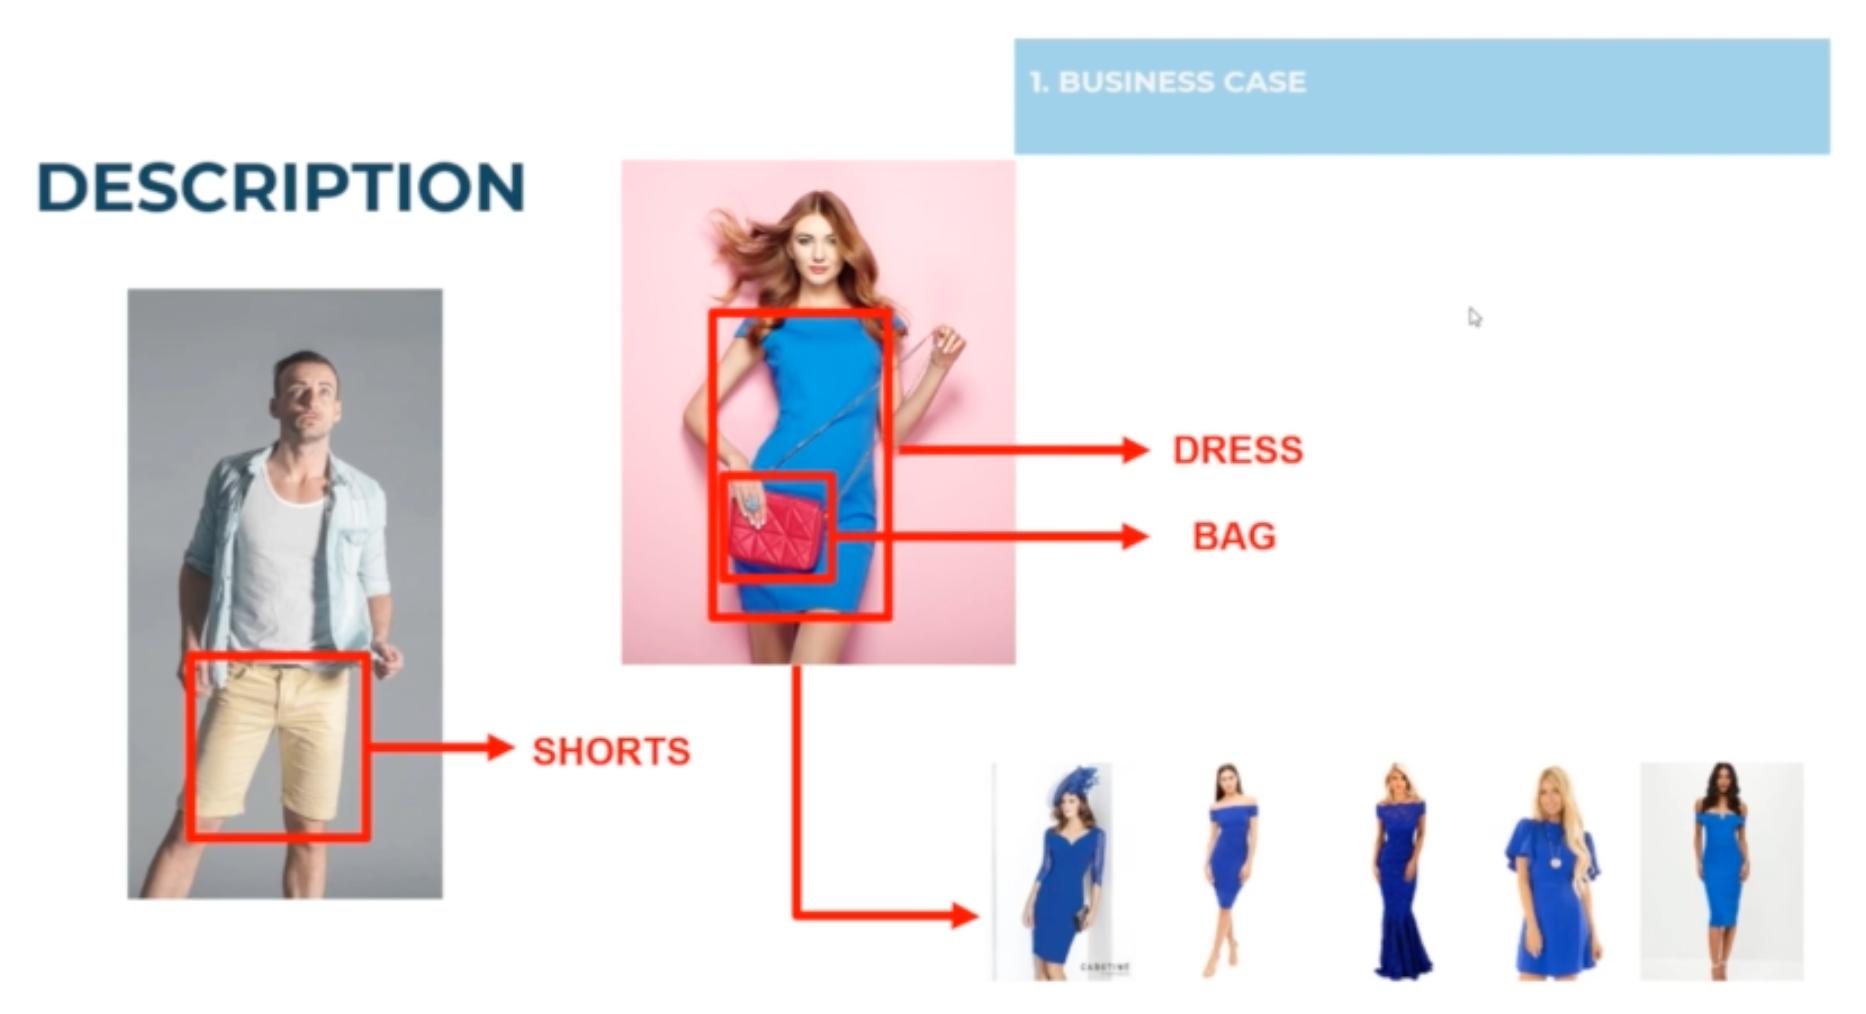

Eventually we wanted to build kind of an app or a model that can look at images and can tell us exactly what category in this image. Is it like a short is it a bag? Is it like a hat and so on. 
So we wanted to build kind of artificial intelligence based deep learning model that can classify images into different categories or different classes. 

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

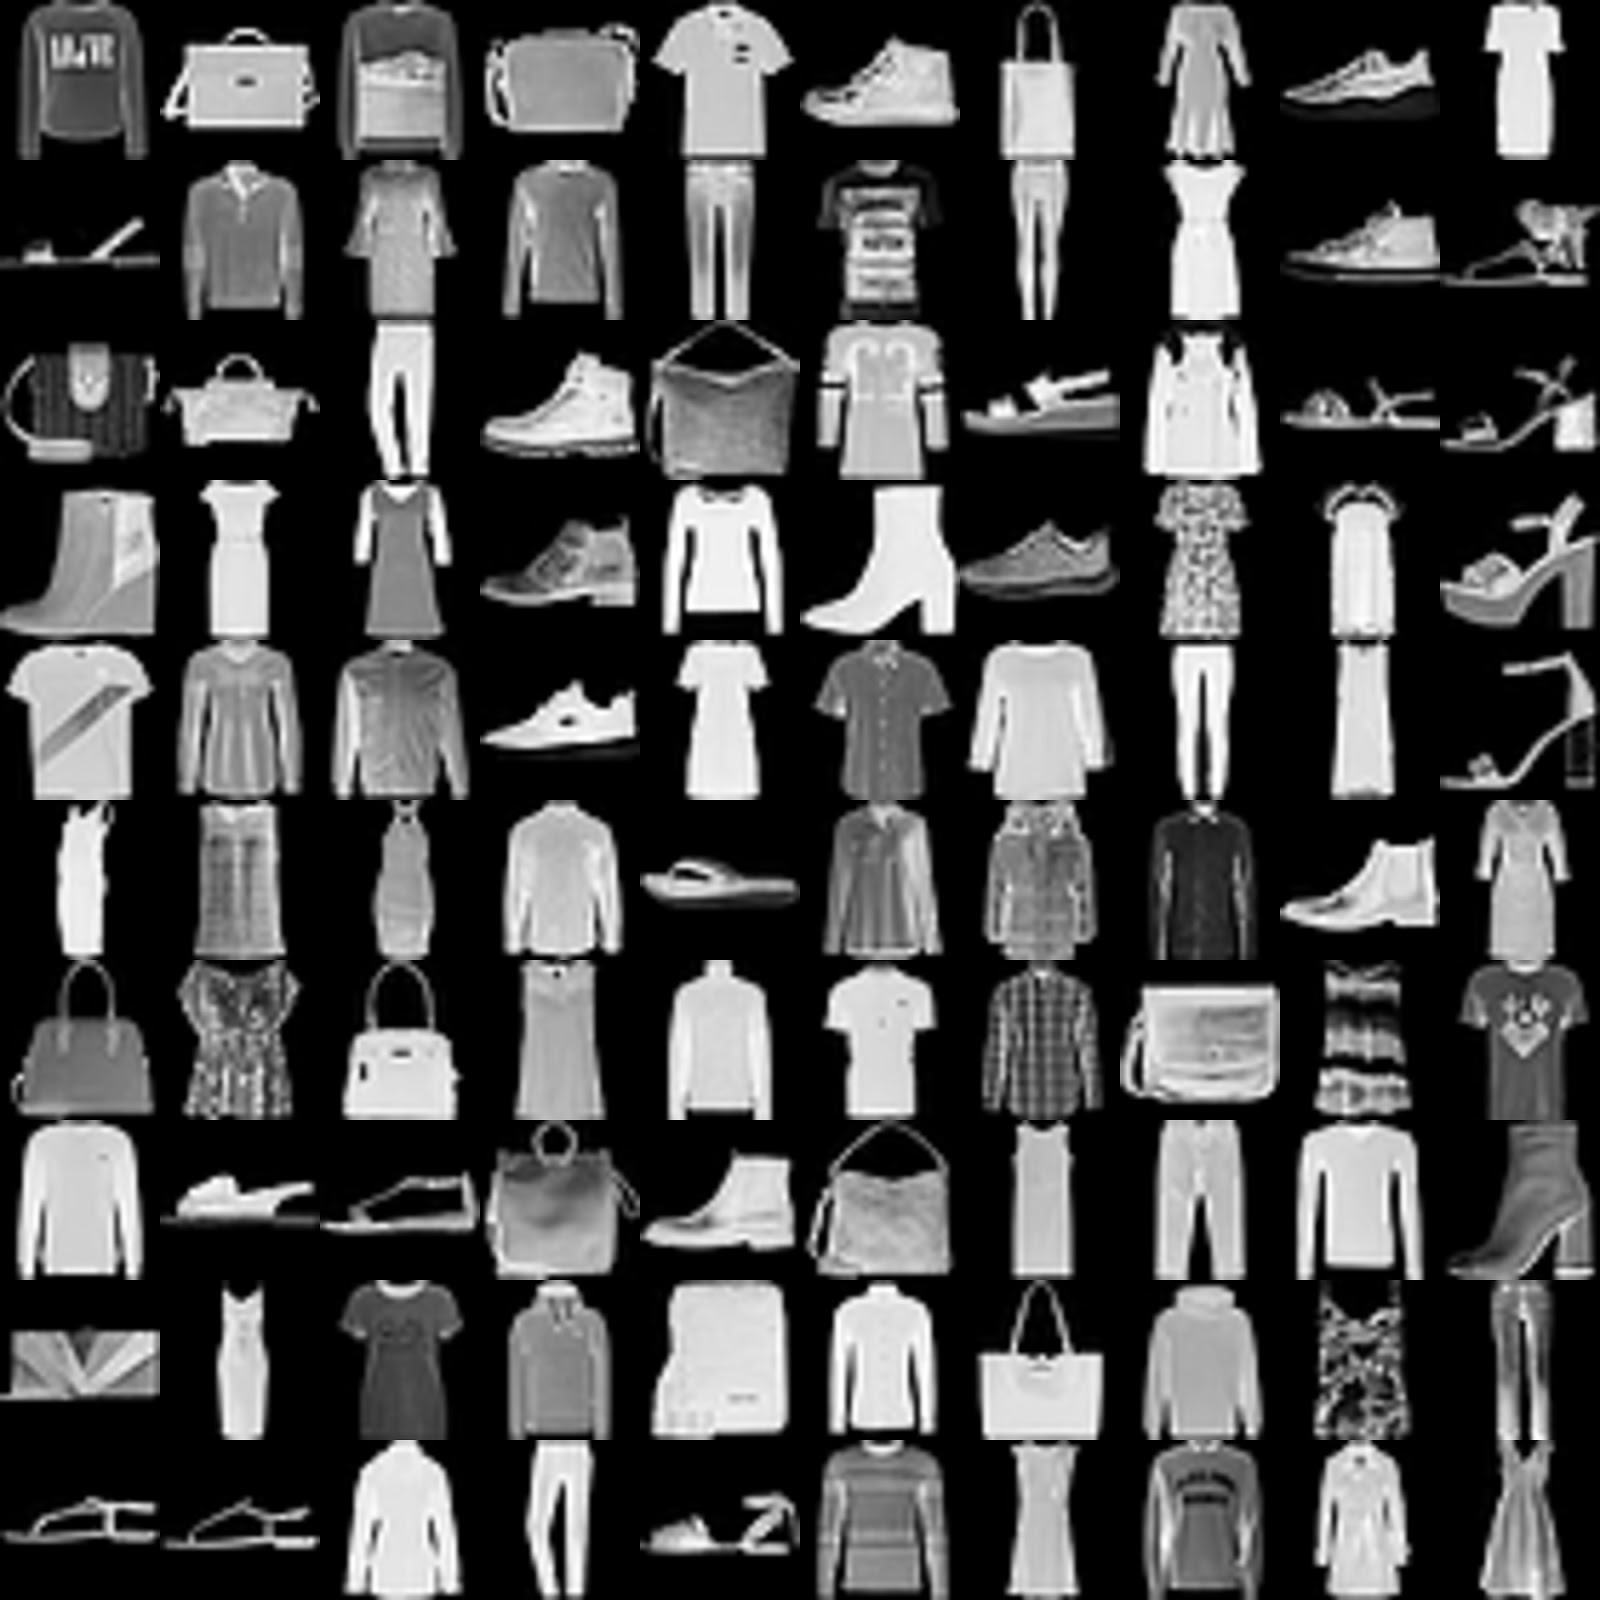


# STEP #2: IMPORTING DATA

In [5]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [6]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [7]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [8]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[5 rows x 785 columns]

In [9]:
# Let's view the head of the testing dataset
fashion_test_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [10]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
9995       0  ...        32        23        14        20         0         0   
9996       0  ...         0         0         0         2        52        23   
9997       0  ...       175       172       172       182       199       222   
9998       0  ...         0         0         0         0         0         1   
9999     119  ...       111        95        75        44         1         0   

      pixel781  pixel782  pixel783  pixel784  
9995         1         0         0         0  
9996        28         0         0         0  
9997        42         0         1         0  
9998         0         0         0         0  
9999         0         0         0         0  

[5 rows x 785 columns]

In [11]:
fashion_train_df.shape

(60000, 785)

In [12]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [13]:
training.shape

(60000, 785)

In [14]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

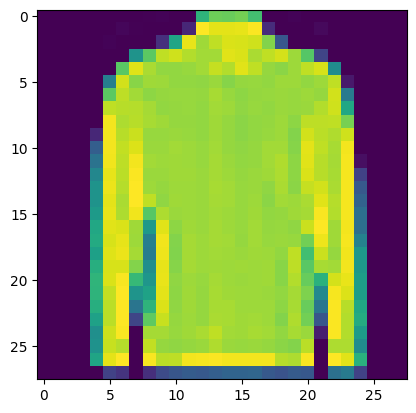

In [16]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

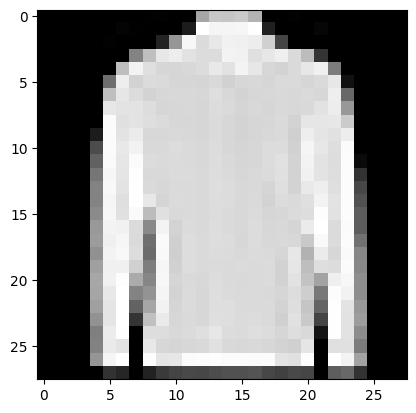

In [17]:
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [18]:
label = training[i,0]
label


6.0

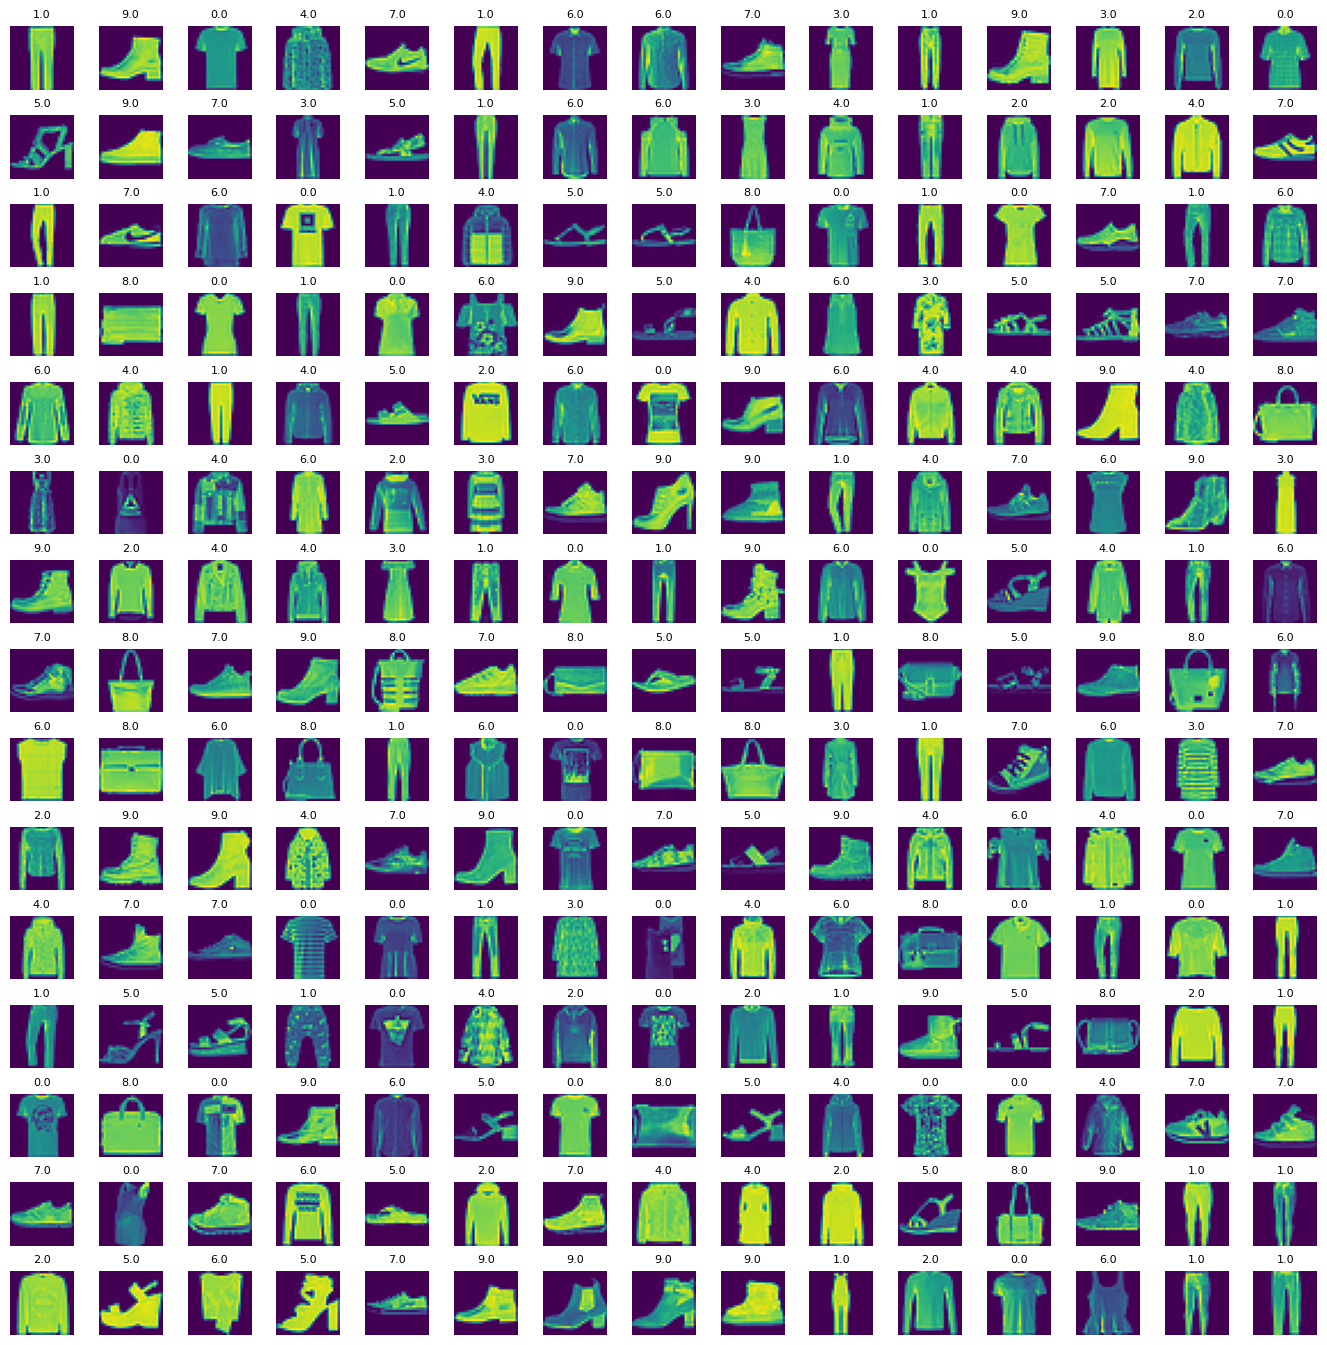

In [19]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4) # to be able to view the data 

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [20]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [21]:
from sklearn.model_selection import train_test_split
# validation dataset that might used to help the model to generalize
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [22]:
X_train.shape

(48000, 784)

In [23]:
y_train.shape

(48000,)

In [24]:
# * unpack the tuple. Reshape the data in a form that CNN can accept 
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [25]:
X_train.shape

(48000, 28, 28, 1)

In [26]:
X_test.shape

(10000, 28, 28, 1)

In [27]:
X_validate.shape

(12000, 28, 28, 1)

In [28]:
import keras # open source Neural network library madke our life much easier

# This converts the category index to its binary representation
# by assigning a one somewhere into the array ranging from 0 to the number
# of categories
# c_y_train = keras.utils.to_categorical(y_train, 10)



2024-10-09 10:59:54.185812: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 10:59:54.192118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 10:59:54.198868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 10:59:54.200806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 10:59:54.206217: I tensorflow/core/platform/cpu_feature_guar

In [29]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [39]:
# build your CNN model using keras 

# 2. Start with Convoltional layer ** try to use the hint that we discussed in the lecture of the lab in 
#    order to enhance the model 

# Apply the non linearity 

# 3. pooling 

# 4. faltening 

# 5. Dense layer (think about number layers & what are the activation fucntions)

#5. Complie the model by defineing the cost function and the optimizer for the model as well the used metrics to measure the qulaity of the model 

# 6. Define the training parameters 
    # number of epochs 
    # batch size 
    # traning and validation set 

model = Sequential([
  Input((28,28,1)),
  Conv2D(20, 3), # 20 filters of size 3
  MaxPooling2D(pool_size=2),
  #Dropout(0.1),
  Flatten(),
  Dense(10, activation='softmax'),
])
model.compile(
  'adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  X_train,
  y_train, 
  epochs=5,
  batch_size=1,
  validation_data=(X_validate, y_validate), 
)


Epoch 1/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.8212 - loss: 0.5210 - val_accuracy: 0.8752 - val_loss: 0.3624
Epoch 2/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.8825 - loss: 0.3410 - val_accuracy: 0.8858 - val_loss: 0.3355
Epoch 3/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - accuracy: 0.8922 - loss: 0.3033 - val_accuracy: 0.8907 - val_loss: 0.3282
Epoch 4/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 38s 784us/step - accuracy: 0.9015 - loss: 0.2817 - val_accuracy: 0.8863 - val_loss: 0.3367
Epoch 5/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 45s 945us/step - accuracy: 0.9084 - loss: 0.2630 - val_accuracy: 0.8817 - val_loss: 0.3644


In [40]:

model = Sequential([
  Input((28,28,1)),
  Conv2D(20, 3), # 20 filters of size 3
  MaxPooling2D(pool_size=2),
  Dropout(0.5), # Add regularization
  Flatten(),
  Dense(10, activation='softmax'),
])
model.compile(
  'adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  X_train,
  y_train, 
  epochs=5,
  batch_size=1,
  validation_data=(X_validate, y_validate), 
)


Epoch 1/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 47s 958us/step - accuracy: 0.7949 - loss: 0.5836 - val_accuracy: 0.8606 - val_loss: 0.4235
Epoch 2/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - accuracy: 0.8471 - loss: 0.4480 - val_accuracy: 0.8700 - val_loss: 0.3767
Epoch 3/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.8538 - loss: 0.4275 - val_accuracy: 0.8766 - val_loss: 0.3681
Epoch 4/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 42s 872us/step - accuracy: 0.8524 - loss: 0.4268 - val_accuracy: 0.8593 - val_loss: 0.3957
Epoch 5/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 27s 562us/step - accuracy: 0.8545 - loss: 0.4278 - val_accuracy: 0.8783 - val_loss: 0.3475


# STEP #5: EVALUATING THE MODEL

In [41]:
from sklearn.metrics import confusion_matrix

#Predict
y_predicted = model.predict(X_test)

predicted_classes = np.argmax(y_predicted, axis=1)

# 1. evaluate your model using test_set 
_, test_accuracy = model.evaluate(X_test, y_test)
print(test_accuracy)

# 2. compare the validation accuracy of the last epoch and test accuracy and explain in your words why they are differnt. 

# The test accuracy is different because this is a dataset that the model has 
# not seen. We can see that the accuracy of the test data is higher than the validation accurayc.
# This is a sign that our model has generalized well.

# Q. Discuss how to enhance the performance of the model and explain in your words why that help and how much ?!
# hint: update the architecture by adding dropout regularization 

# A: We see that after a few epochs the validation loss starts to increase, we believe that this could be
# because of the batch size being set to 1. Because of the frequent weight updates the model's
# variance increases, and thus overfits. By adding dropout regularization we make the model 
# intentionally "forget" certain inputs at a certain layer to decrease the risk of overfitting
# and increase the chance of improved generalization. We can prove this by looking at the validation
# loss between the two different models. Without Dropout regularization we get: 0.3644, and with regulatization 0.3475
# This is an improvement.

# 3. hint: use the confusion matrix for that 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3445
0.8812999725341797


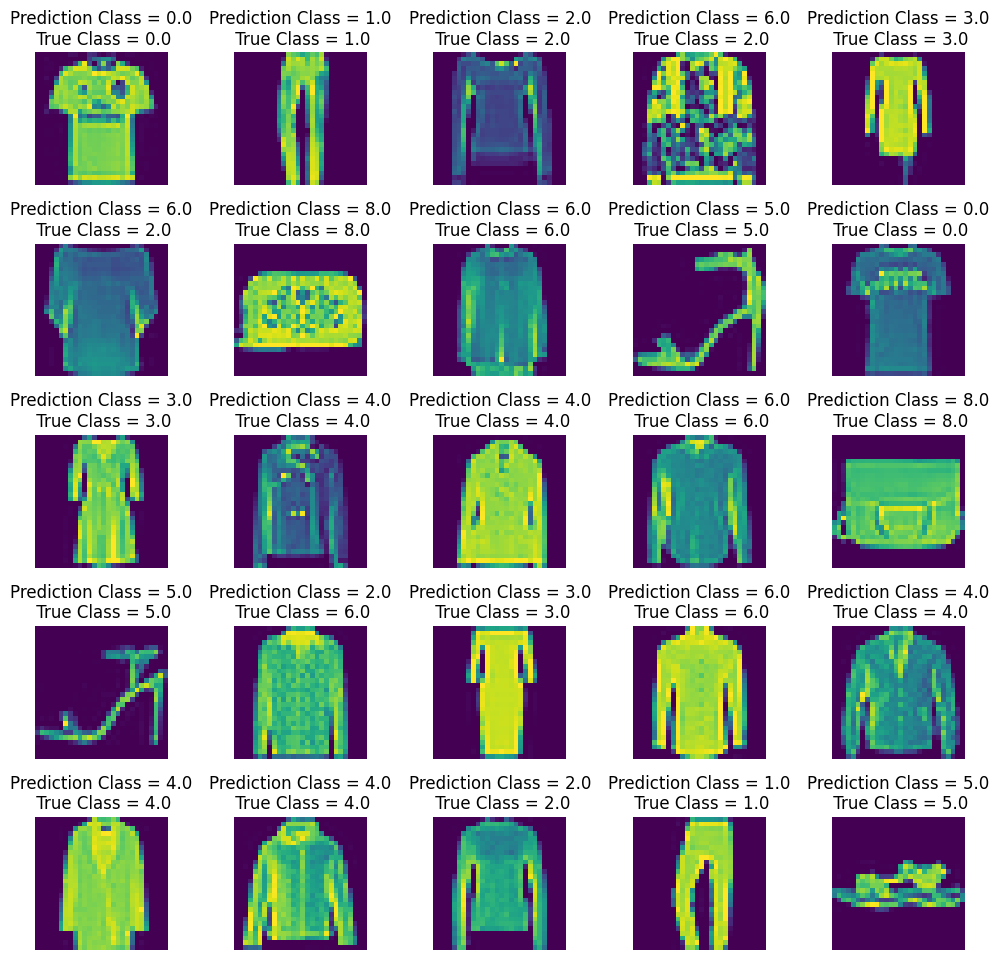

In [42]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


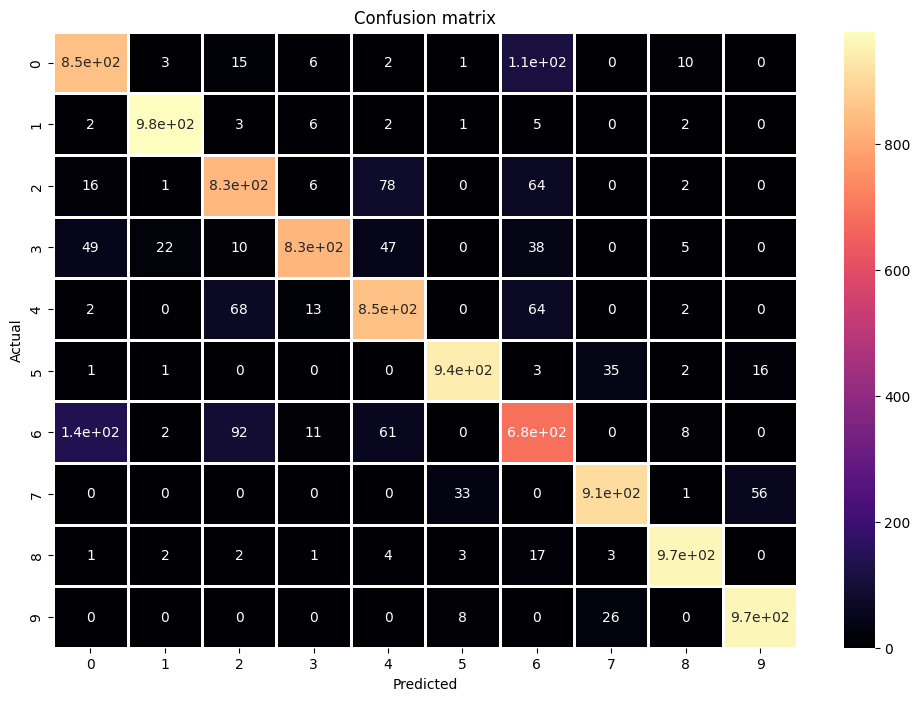

In [43]:
# use seaborn library to plot the confusion matrix 
from sklearn.metrics import confusion_matrix


# Create new plot via pyplot
plt.figure(figsize=(12, 8))

cm=confusion_matrix(y_test, predicted_classes)
# Create the confusion matrix using seaborn heatmap function
sns.heatmap(cm, annot=True, cmap='magma', cbar=True, linewidths=1)

# Set labels for x and y axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')

# Display
plt.show()


In [45]:

# Sum the diagonal element to get the total true correct values
ones=np.identity(cm.shape[0]) # Create an identity matrix to create a mask for the diagonal elements
sumOfDiagonalElements=np.sum(cm * ones) # Mask the diagonal elements, and sum the diagonals
print(sumOfDiagonalElements)

8813.0


In [46]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.85      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.81      0.83      0.82      1000
     Class 3       0.95      0.83      0.89      1000
     Class 4       0.81      0.85      0.83      1000
     Class 5       0.95      0.94      0.95      1000
     Class 6       0.69      0.69      0.69      1000
     Class 7       0.93      0.91      0.92      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

